In [19]:
import numpy as np 
import pandas as pd 
import datetime 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

import folium
from folium import plugins

In [20]:
df1 = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Pakistan%20Drone%20Attacks/PakistanDroneAttacksWithTemp%20Ver%209%20(October%2019%2C%202017).csv", encoding='latin1')
df2 = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Pakistan%20Drone%20Attacks/PakistanDroneAttacksWithTemp%20Ver%2010%20(October%2019%2C%202017).csv", encoding='latin1')
df3 = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Pakistan%20Drone%20Attacks/PakistanDroneAttacksWithTemp%20Ver%2011%20(November%2030%202017).csv", encoding='latin1')

print("01-Data Shape: ", df1.shape)
print("02-Data Shape: ", df2.shape)
print("03-Data Shape: ", df3.shape)

01-Data Shape:  (405, 25)
02-Data Shape:  (405, 25)
03-Data Shape:  (406, 25)


In [21]:
print("Data-01 Columns\n----------------\n", df1.columns)
print("\nData-02 Columns\n----------------\n", df2.columns)
print("\nData-03 Columns\n----------------\n", df3.columns)

Data-01 Columns
----------------
 Index(['S#', 'Date', 'Time', 'Location', 'City', 'Province', 'No of Strike',
       'Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max',
       'Foreigners Min', 'Foreigners Max', 'Total Died Min', 'Total Died Mix',
       'Injured Min', 'Injured Max', 'Women/Children  ',
       'Special Mention (Site)', 'Comments', 'References', 'Longitude',
       'Latitude', 'Temperature(C)', 'Temperature(F)'],
      dtype='object')

Data-02 Columns
----------------
 Index(['S#', 'Date', 'Time', 'Location', 'City', 'Province', 'No of Strike',
       'Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max',
       'Foreigners Min', 'Foreigners Max', 'Total Died Min', 'Total Died Mix',
       'Injured Min', 'Injured Max', 'Women/Children  ',
       'Special Mention (Site)', 'Comments', 'References', 'Longitude',
       'Latitude', 'Temperature(C)', 'Temperature(F)'],
      dtype='object')

Data-03 Columns
----------------
 Index(['S#', 'Date', 'Time', 'Location', '

In [22]:
df1.rename( columns={'Total Died Mix' : 'Total Died Max'}, inplace=True)
df2.rename( columns={'Total Died Mix' : 'Total Died Max'}, inplace=True)
print("Data-01 Columns\n----------------\n", df1.columns)
print("\nData-02 Columns\n----------------\n", df2.columns)
print("\nData-03 Columns\n----------------\n", df3.columns)

Data-01 Columns
----------------
 Index(['S#', 'Date', 'Time', 'Location', 'City', 'Province', 'No of Strike',
       'Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max',
       'Foreigners Min', 'Foreigners Max', 'Total Died Min', 'Total Died Max',
       'Injured Min', 'Injured Max', 'Women/Children  ',
       'Special Mention (Site)', 'Comments', 'References', 'Longitude',
       'Latitude', 'Temperature(C)', 'Temperature(F)'],
      dtype='object')

Data-02 Columns
----------------
 Index(['S#', 'Date', 'Time', 'Location', 'City', 'Province', 'No of Strike',
       'Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max',
       'Foreigners Min', 'Foreigners Max', 'Total Died Min', 'Total Died Max',
       'Injured Min', 'Injured Max', 'Women/Children  ',
       'Special Mention (Site)', 'Comments', 'References', 'Longitude',
       'Latitude', 'Temperature(C)', 'Temperature(F)'],
      dtype='object')

Data-03 Columns
----------------
 Index(['S#', 'Date', 'Time', 'Location', '

In [23]:
data = pd.concat([df1, df2, df3], ignore_index=True)
data.shape

(1216, 25)

In [24]:
data.columns

Index(['S#', 'Date', 'Time', 'Location', 'City', 'Province', 'No of Strike',
       'Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max',
       'Foreigners Min', 'Foreigners Max', 'Total Died Min', 'Total Died Max',
       'Injured Min', 'Injured Max', 'Women/Children  ',
       'Special Mention (Site)', 'Comments', 'References', 'Longitude',
       'Latitude', 'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [25]:
data = data.rename(columns=lambda x: x.strip())
data.columns

Index(['S#', 'Date', 'Time', 'Location', 'City', 'Province', 'No of Strike',
       'Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max',
       'Foreigners Min', 'Foreigners Max', 'Total Died Min', 'Total Died Max',
       'Injured Min', 'Injured Max', 'Women/Children',
       'Special Mention (Site)', 'Comments', 'References', 'Longitude',
       'Latitude', 'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [26]:
df = data.drop('S#', axis=1)
df.shape

(1216, 24)

In [27]:
df.isna().sum()

Date                        3
Time                      695
Location                    8
City                        3
Province                    3
No of Strike                3
Al-Qaeda                  924
Taliban                   792
Civilians Min             207
Civilians Max             138
Foreigners Min            936
Foreigners Max            795
Total Died Min            291
Total Died Max              9
Injured Min               780
Injured Max               387
Women/Children            207
Special Mention (Site)    225
Comments                  687
References                 21
Longitude                   5
Latitude                    5
Temperature(C)             10
Temperature(F)             10
dtype: int64

In [28]:
for x, xRow in df.iteritems():
    if (xRow.dtype != 'object'):
        df[x] = df[x].fillna(0)
        
df.isna().sum()

Date                        3
Time                      695
Location                    8
City                        3
Province                    3
No of Strike                0
Al-Qaeda                    0
Taliban                     0
Civilians Min               0
Civilians Max               0
Foreigners Min              0
Foreigners Max              0
Total Died Min              0
Total Died Max              0
Injured Min                 0
Injured Max                 0
Women/Children            207
Special Mention (Site)    225
Comments                  687
References                 21
Longitude                   0
Latitude                    0
Temperature(C)              0
Temperature(F)              0
dtype: int64

In [29]:
fltCols = {'Longitude', 'Latitude', 'Temperature(C)', 'Temperature(F)'}
strCols = {'Date', 'Time', 'Location', 'City', 'Province', 'Women/Children', 'Special Mention (Site)', 'Comments', 'References'}
numCols = {'No of Strike', 'Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max', 'Foreigners Min', 'Foreigners Max', 
           'Total Died Min', 'Total Died Max', 'Injured Min', 'Injured Max'}

for x, xCols in df.iteritems():
    if x in fltCols:
        df[x] = df[x].astype('float64')
    if x in strCols:
        df[x] = df[x].str.lower()
        df[x] = df[x].astype('object')
    if x in numCols:
        df[x] = df[x].astype('int64')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1213 non-null   object 
 1   Time                    521 non-null    object 
 2   Location                1208 non-null   object 
 3   City                    1213 non-null   object 
 4   Province                1213 non-null   object 
 5   No of Strike            1216 non-null   int64  
 6   Al-Qaeda                1216 non-null   int64  
 7   Taliban                 1216 non-null   int64  
 8   Civilians Min           1216 non-null   int64  
 9   Civilians Max           1216 non-null   int64  
 10  Foreigners Min          1216 non-null   int64  
 11  Foreigners Max          1216 non-null   int64  
 12  Total Died Min          1216 non-null   int64  
 13  Total Died Max          1216 non-null   int64  
 14  Injured Min             1216 non-null   

In [30]:
df.tail()

,Date,Time,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,Civilians Max,...,Injured Min,Injured Max,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)
1211,"monday july 03, 2017",NaN,marghalan village,south waziristan,fata,2,0,0,0,0,...,0,0,n,a cia-operated drone carried out a missile att...,NaN,https://www.dawn.com/news/1343100,32.120819,69.589987,23.0,74.000
1212,"friday september 15, 2017",NaN,ghuz ghari,kurram agency,fata,2,0,0,0,0,...,2,2,n,a us drone killed three suspected afghan talib...,NaN,https://www.dawn.com/news/1357853; https://www...,33.732174,70.150755,21.3,70.331
1213,"monday october 16, 2017",17:37,kurram district,lower kurram agency,fata,4,0,5,0,0,...,0,0,n,one of the dead was identified by local offici...,conflict of report: foreign media reported tha...,http://www.thesundaily.my/news/2017/10/18/deat...,33.736222,70.195576,16.7,62.070
1214,"thursday november 30,2017",4:30,near pak-afghan border,kurram agency,fata,2,0,1,2,2,...,0,0,n,"taliban commander rasheed, is among the killed",unverified reports suggest the target of the s...,https://www.geo.tv/latest/170034-three-reporte...,33.732174,70.150755,8.2,39.200
1215,NaN,NaN,NaN,NaN,NaN,0,49,663,1306,2544,...,402,1329,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000


In [31]:
df['Date'] = df['Date'].fillna(0)
df[df['Date'].isna()]

,Date,Time,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,Civilians Max,...,Injured Min,Injured Max,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)


In [32]:
df[df['Date'] == 0 ]

,Date,Time,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,Civilians Max,...,Injured Min,Injured Max,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)
404,0,NaN,NaN,NaN,NaN,0,49,662,1304,2542,...,402,1329,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
809,0,NaN,NaN,NaN,NaN,0,49,662,1304,2542,...,402,1329,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1215,0,NaN,NaN,NaN,NaN,0,49,663,1306,2544,...,402,1329,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [33]:
df = df.drop(df[df['Date'] == 0].index)
df[df['Date'] == 0 ]

,Date,Time,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,Civilians Max,...,Injured Min,Injured Max,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)


In [34]:
df['Date'] = df['Date'].str.strip()
df['Date'] = df['Date'].str.replace(',', '-')
print("Max Year: ", pd.DatetimeIndex(df['Date']).year.max(),
      "\nMin Year: ", pd.DatetimeIndex(df['Date']).year.min())

Max Year:  2017 
Min Year:  2004


In [35]:
df['City'].value_counts()

north waziristan       867
south waziristan       279
khyber agency           15
bajaur  agency          12
kurram agency           10
bannu                    9
lower kurram agency      6
khyber                   3
orakzai                  3
hungu                    3
dalbandin                3
hangu                    3
Name: City, dtype: int64

In [36]:
df['City'] = df['City'].str.replace('bajaur  agency', 'bajaur agency')
df['City'] = df['City'].str.replace('hungu', 'hangu')
df['City'].value_counts()

north waziristan       867
south waziristan       279
khyber agency           15
bajaur agency           12
kurram agency           10
bannu                    9
lower kurram agency      6
hangu                    6
khyber                   3
orakzai                  3
dalbandin                3
Name: City, dtype: int64

In [37]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,Time,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,Civilians Max,...,Injured Max,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F),year
0,friday- june 18- 2004,22:00,near wana,south waziristan,fata,1,0,1,0,4,...,0,n,blast occured in courtyard of the house of lon...,village in wana,http://archives.dawn.com/2004/06/19/top1.htm,69.9000,33.0333,28.475,83.255,2004
1,sunday- may 08- 2005,23:30,mir ali (near afghan border),north waziristan,fata,1,1,0,0,1,...,0,n,drone struck a car driven by local warlord- ki...,civilian killied was samiullah khan who was a ...,http://www.msnbc.msn.com/id/7847008/,70.1455,32.9746,11.475,52.655,2005
2,thursday- december 01- 2005,NaN,haisori- miran shah,north waziristan,fata,1,1,0,0,1,...,2,NaN,explosive occurred at a mud house,no. 3 al-qaeda's leader abuhamza rabia killed ...,http://edition.cnn.com/2005/world/asiapcf/12/0...,70.1455,32.9746,7.080,44.744,2005
3,friday- january 06- 2006,NaN,saidgai village- 115km north of wana,north waziristan,fata,1,0,0,0,0,...,2,NaN,NaN,NaN,http://www.reuters.com/article/2007/04/27/us-p...,70.1455,32.9746,0.535,32.963,2006
4,friday- january 13- 2006,3:00,damadola village,bajaur agency,fata,1,0,0,0,18,...,2,y,three houses were tarheted in damadola village...,masood khan house was among those bombed. want...,http://www.dailytimes.com.pk/default.asp?page=...,71.5000,34.6833,10.025,50.045,2006


In [38]:
df[df['year'] == 2004][['Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max', 
                        'Foreigners Min', 'Foreigners Max', 'Total Died Min', 'Total Died Max', 
                        'Injured Min', 'Injured Max']]

,Al-Qaeda,Taliban,Civilians Min,Civilians Max,Foreigners Min,Foreigners Max,Total Died Min,Total Died Max,Injured Min,Injured Max
0,0,1,0,4,0,0,0,5,0,0
405,0,1,0,4,0,0,0,5,0,0
810,0,1,0,4,0,0,0,5,0,0


In [39]:
dfKill = pd.DataFrame(df, columns=['year', 'Al-Qaeda', 'Taliban', 
                                   'Civilians Min', 'Civilians Max', 
                                   'Foreigners Min', 'Foreigners Max', 
                                   'Total Died Min', 'Total Died Max', 
                                   'Injured Min', 'Injured Max', 'No of Strike'])

dfKill['Civilians'] = ((dfKill['Civilians Min'] + dfKill['Civilians Max'])/2).apply(np.ceil).astype('int64')
dfKill['Foreigners'] = ((dfKill['Foreigners Min'] + dfKill['Foreigners Max'])/2).apply(np.ceil).astype('int64')
dfKill['Total-Injured'] = ((dfKill['Injured Min'] + dfKill['Injured Max'])/2).apply(np.ceil).astype('int64')
dfKill['Total-Killed'] = ((dfKill['Total Died Min'] + dfKill['Total Died Max'])/2).apply(np.ceil).astype('int64')

dfKill.rename( columns={'No of Strike' : 'no-of-strike'}, inplace=True)
dfKill['no-of-strike'] = (dfKill['no-of-strike']).apply(np.ceil).astype('int64')

dfKill = dfKill.drop(['Civilians Min', 'Civilians Max', 'Foreigners Min', 'Foreigners Max', 
                      'Total Died Min', 'Total Died Max', 'Injured Min', 'Injured Max'], axis=1)
dfKillbyYear = dfKill.groupby(['year'], as_index=False).sum().sort_values('year', ascending=False)
dfKillbyYear

,year,Al-Qaeda,Taliban,no-of-strike,Civilians,Foreigners,Total-Injured,Total-Killed
13,2017,0,43,41,11,0,6,141
12,2016,0,3,18,3,0,3,21
11,2015,12,153,84,45,15,36,276
10,2014,0,393,156,18,72,114,537
9,2013,15,249,168,159,33,171,405
8,2012,21,240,315,525,90,192,804
7,2011,18,162,237,1086,63,285,1437
6,2010,3,330,369,2043,159,855,2418
5,2009,39,336,171,1212,105,675,1485
4,2008,33,75,165,642,156,339,903


In [40]:
print('People Kill in Last 12-Years: ', dfKillbyYear[dfKillbyYear['year'] > dfKillbyYear['year'].max()-12 ]['Total-Killed'].sum() )
print('People Injured in Last 12-Years: ', dfKillbyYear[dfKillbyYear['year'] > dfKillbyYear['year'].max()-12 ]['Total-Injured'].sum() )

People Kill in Last 12-Years:  8691
People Injured in Last 12-Years:  2739


In [41]:
for x, xCols in dfKill.iteritems():
    if(x != 'year'):
        print(x, ": ", dfKill[x].sum())

Al-Qaeda :  147
Taliban :  1987
no-of-strike :  1760
Civilians :  6008
Foreigners :  705
Total-Injured :  2742
Total-Killed :  8712


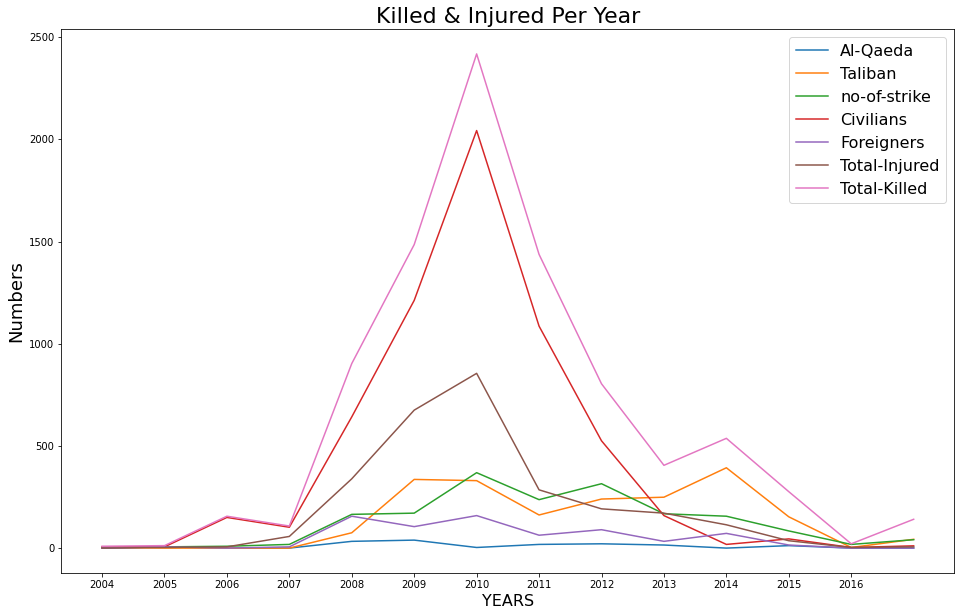

In [42]:
fig = plt.figure(figsize=(16, 10))
x = dfKillbyYear['year']
for y, yCols in dfKillbyYear.iteritems():
    if(y != 'year'):
        plt.plot(x, dfKillbyYear[y], label = y)

plt.xticks(range(dfKillbyYear['year'].min(), dfKillbyYear['year'].max()))
plt.xlabel("YEARS", fontsize=16)
plt.ylabel("Numbers", fontsize=18)
plt.title("Killed & Injured Per Year", fontsize=22)
plt.legend(fontsize = 16)
plt.show()

In [43]:
def plotData(df, xColName, yColName):
    
    figKill = [go.Bar(y = df[yColName],
                      x = df[xColName],
                      text = np.round((df[yColName]), 1),
                      textposition = 'outside',
                      width = [0.7, 0.7],
                      marker = dict(color = 'darkorchid', 
                                    line_color = 'cadetblue', 
                                    line_width = 2))]
    
    layout = go.Layout(title= yColName +' Killed Per Year',
                       xaxis = dict(title = xColName),
                       yaxis = dict(title = yColName),
                       width = 800,
                       height = 600,
                       template = 'plotly_white')

    myfig = go.Figure(data = figKill, layout = layout)
    
    return myfig
for x, xCols in dfKillbyYear.iteritems():
    if(x != 'year'):
        plotfig = plotData(dfKillbyYear, 'year', x)
        iplot(plotfig)

In [44]:
dfKill.head()

,year,Al-Qaeda,Taliban,no-of-strike,Civilians,Foreigners,Total-Injured,Total-Killed
0,2004,0,1,1,2,0,0,3
1,2005,1,0,1,1,0,0,1
2,2005,1,0,1,1,2,1,3
3,2006,0,0,1,0,0,1,2
4,2006,0,0,1,9,0,1,9


In [45]:
print('Number of Attacks Involved Killing of Terrorists from Taliban: ', dfKill[dfKill['Taliban'] > 0]['no-of-strike'].sum() )
print('Number of Attacks Involved Killing of Terrorists from Al-Qaeda: ', dfKill[dfKill['Al-Qaeda'] > 0]['no-of-strike'].sum() )

Number of Attacks Involved Killing of Terrorists from Taliban:  416
Number of Attacks Involved Killing of Terrorists from Al-Qaeda:  96


In [46]:
print('Total Taliban Killed: ', dfKill[dfKill['Taliban'] > 0 ]['no-of-strike'].sum() )
print('Total Al-Qaeda Killed: ', dfKill[dfKill['Al-Qaeda'] > 0 ]['no-of-strike'].sum() )
print('---------------------------------------------------' )
print('Total Drone Attacks: ', dfKill['no-of-strike'].sum() )

Total Taliban Killed:  416
Total Al-Qaeda Killed:  96
---------------------------------------------------
Total Drone Attacks:  1760


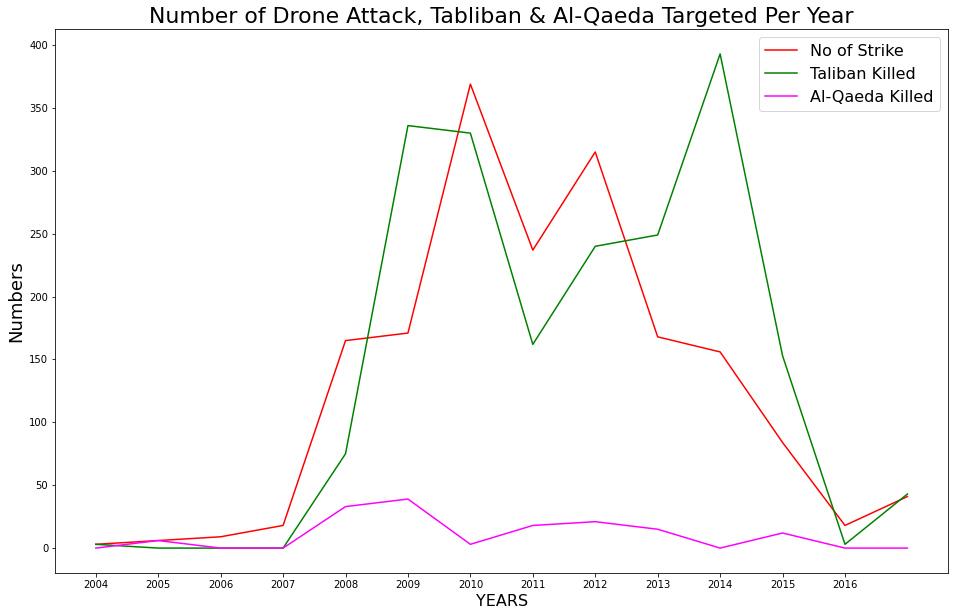

In [48]:
dfStriker = dfKillbyYear.drop(['Civilians', 'Foreigners', 'Total-Injured', 'Total-Killed'], axis=1)

fig = plt.figure(figsize=(16, 10))
x = dfStriker['year']#.keys()

plt.plot(x, dfStriker['no-of-strike'], color='red', label = 'No of Strike')
plt.plot(x, dfStriker['Taliban'], color='green', label = 'Taliban Killed')
plt.plot(x, dfStriker['Al-Qaeda'], color='magenta', label = 'Al-Qaeda Killed')

plt.xticks(range(df['year'].min(), df['year'].max()))
plt.xlabel("YEARS", fontsize=16)
plt.ylabel("Numbers", fontsize=18)
plt.title("Number of Drone Attack, Tabliban & Al-Qaeda Targeted Per Year", fontsize=22)
plt.legend(fontsize = 16)
plt.show()

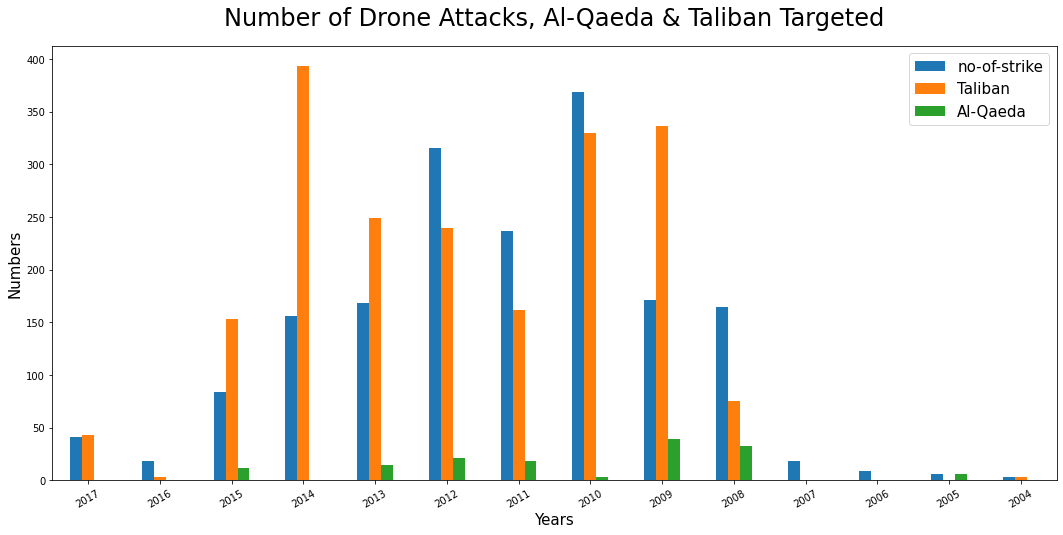

In [49]:
fig = dfStriker.plot(x='year', 
                y=['no-of-strike', 'Taliban', 'Al-Qaeda'], 
                kind="bar", 
                figsize=(18,8), align='center'
                 )
fig.set_title("Number of Drone Attacks, Al-Qaeda & Taliban Targeted", pad=20, fontdict={'fontsize':24})
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Years", fontsize=15)
plt.ylabel("Numbers", fontsize=15)
fig.legend(loc=1,fontsize=15)

In [50]:
df['Women/Children'] = df['Women/Children'].fillna('n')
df['Women/Children'] = df['Women/Children'].replace('y', 1)
df['Women/Children'] = df['Women/Children'].replace('n', 0)
df['Women/Children'] = df['Women/Children'].astype('int64')
print('Number of Attacks Involved Women and Children: ', df[df['Women/Children'] == 1]['No of Strike'].sum() )
print('Number of Attacks Not Involved Women and Children: ', df[df['Women/Children'] == 0]['No of Strike'].sum() )

Number of Attacks Involved Women and Children:  144
Number of Attacks Not Involved Women and Children:  1616


Text(0, 0.5, 'Numbers')

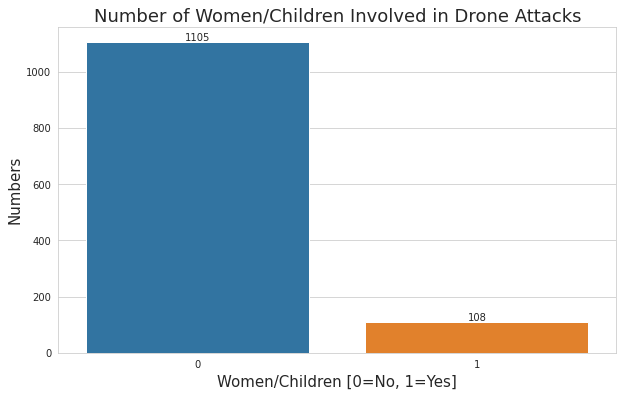

In [51]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,6))
ax = sns.countplot(x="Women/Children", data=df) # [0=No, 1=Yes]
for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Number of Women/Children Involved in Drone Attacks", fontsize=18)
plt.xlabel("Women/Children [0=No, 1=Yes]", fontsize=15)
plt.ylabel("Numbers", fontsize=15)

In [52]:
dfWomenChild = pd.DataFrame(df, columns=['year', 'Women/Children', 'No of Strike']).astype('int64')
dfWomenChild = dfWomenChild.rename(columns={'No of Strike': 'no-of-strike'})
dfWomenChild
dfWomenChildbyYear = dfWomenChild[dfWomenChild['Women/Children'] != 0 ].groupby(['year', 'Women/Children'], as_index=False).sum().sort_values('year', ascending=False)
dfWomenChildbyYear

,year,Women/Children,no-of-strike
7,2014,1,6
6,2012,1,9
5,2011,1,12
4,2010,1,24
3,2009,1,27
2,2008,1,51
1,2007,1,9
0,2006,1,6


In [55]:
trace = go.Scatter(
    x = dfKillbyYear['year'],
    y = dfKillbyYear['no-of-strike'],
    mode = 'lines+markers'
)
fig = go.Figure(data=trace)
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Number of Attacks')
fig.update_layout(title_text='Drone Attacks Timeline', title_x=0.5, title_font_size=25)

fig.show()

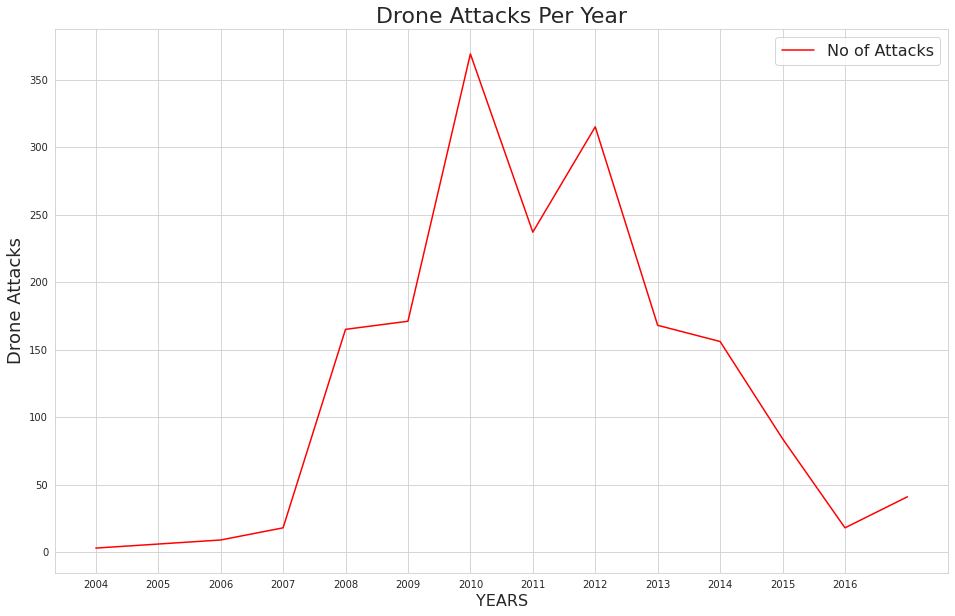

In [56]:
fig = plt.figure(figsize=(16, 10))
x = dfKillbyYear['year']

plt.plot(x, dfKillbyYear['no-of-strike'], color='red', label = 'No of Attacks')

plt.xticks(range(dfKillbyYear['year'].min(), dfKillbyYear['year'].max()))
plt.xlabel("YEARS", fontsize=16)
plt.ylabel("Drone Attacks", fontsize=18)
plt.title("Drone Attacks Per Year", fontsize=22)
plt.legend(fontsize = 16)
plt.show()

In [57]:

print("1. George W. Bush Tenure was: 20-01-2001 to 20-01-2009 \n" + 
      "2. Bark Obama Tenure was: 20-01-2009 to 20-01-2017 \n" + 
      "3. Donald Trump Tenure was: 20-01-2017 to 20-01-2021")
print("-------------------------------------------------------")
print("Number of Drone Attacks in Bush Tenure: ", df[pd.DatetimeIndex(df['Date']) < '2009-01-20']['No of Strike'].sum())
print("Number of Drone Attacks in Obama Tenure: ", 
      df[ (pd.DatetimeIndex(df['Date']) >= '2009-01-20') & (pd.DatetimeIndex(df['Date']) < '2017-01-20') ]['No of Strike'].sum() )
print("Number of Drone Attacks in Donald Trump Tenure: ", df[pd.DatetimeIndex(df['Date']) >= '2017-01-20']['No of Strike'].sum())

print("\n-------------------------------------------------------\n" +
      "Total Drone Attacks From Year 2001 to 2021: ", str(df['No of Strike'].sum()) + 
      "\n-------------------------------------------------------" )

1. George W. Bush Tenure was: 20-01-2001 to 20-01-2009 
2. Bark Obama Tenure was: 20-01-2009 to 20-01-2017 
3. Donald Trump Tenure was: 20-01-2017 to 20-01-2021
-------------------------------------------------------
Number of Drone Attacks in Bush Tenure:  210
Number of Drone Attacks in Obama Tenure:  1509
Number of Drone Attacks in Donald Trump Tenure:  41

-------------------------------------------------------
Total Drone Attacks From Year 2001 to 2021:  1760
-------------------------------------------------------


In [58]:
df['customDate'] = pd.to_datetime(df['Date'])
df.head()

,Date,Time,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,Civilians Max,...,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F),year,customDate
0,friday- june 18- 2004,22:00,near wana,south waziristan,fata,1,0,1,0,4,...,0,blast occured in courtyard of the house of lon...,village in wana,http://archives.dawn.com/2004/06/19/top1.htm,69.9000,33.0333,28.475,83.255,2004,2004-06-18
1,sunday- may 08- 2005,23:30,mir ali (near afghan border),north waziristan,fata,1,1,0,0,1,...,0,drone struck a car driven by local warlord- ki...,civilian killied was samiullah khan who was a ...,http://www.msnbc.msn.com/id/7847008/,70.1455,32.9746,11.475,52.655,2005,2005-05-08
2,thursday- december 01- 2005,NaN,haisori- miran shah,north waziristan,fata,1,1,0,0,1,...,0,explosive occurred at a mud house,no. 3 al-qaeda's leader abuhamza rabia killed ...,http://edition.cnn.com/2005/world/asiapcf/12/0...,70.1455,32.9746,7.080,44.744,2005,2005-12-01
3,friday- january 06- 2006,NaN,saidgai village- 115km north of wana,north waziristan,fata,1,0,0,0,0,...,0,NaN,NaN,http://www.reuters.com/article/2007/04/27/us-p...,70.1455,32.9746,0.535,32.963,2006,2006-01-06
4,friday- january 13- 2006,3:00,damadola village,bajaur agency,fata,1,0,0,0,18,...,1,three houses were tarheted in damadola village...,masood khan house was among those bombed. want...,http://www.dailytimes.com.pk/default.asp?page=...,71.5000,34.6833,10.025,50.045,2006,2006-01-13


In [59]:
dfTenure = pd.DataFrame()
dfTenure['year'] = df['year'].unique()
dfTenure['GWBush'] = 0
dfTenure['BObama'] = 0
dfTenure['DTrump'] = 0

for x, xRow in dfTenure.iterrows():
    
    if(xRow['year'] <= 2009):
        getTot = df[(df['customDate'] < '2009-01-20') & (df['year'] == xRow['year'])]['No of Strike'].sum()
        dfTenure.at[x, 'GWBush'] = getTot
        dfTenure.at[x, 'BObama'] = dfTenure.at[x, 'BObama'] + 0
        dfTenure.at[x, 'DTrump'] = dfTenure.at[x, 'DTrump'] + 0
        
    if(xRow['year'] >= 2009):
        getTot = df[(df['customDate'] >= '2009-01-20') & (df['customDate'] < '2017-01-20') & (df['year'] == xRow['year']) ]['No of Strike'].sum()
        dfTenure.at[x, 'GWBush'] = dfTenure.at[x, 'GWBush'] + 0
        dfTenure.at[x, 'DTrump'] = dfTenure.at[x, 'DTrump'] + 0
        dfTenure.at[x, 'BObama'] = getTot
        
    if (xRow['year'] >= 2017):
        getTot = df[(df['customDate'] >= '2017-01-20') & (df['year'] == xRow['year']) ]['No of Strike'].sum()
        dfTenure.at[x, 'GWBush'] = dfTenure.at[x, 'GWBush'] + 0
        dfTenure.at[x, 'BObama'] = dfTenure.at[x, 'GWBush'] + 0
        dfTenure.at[x, 'DTrump'] = getTot
        
dfTenure

,year,GWBush,BObama,DTrump
0,2004,3,0,0
1,2005,6,0,0
2,2006,9,0,0
3,2007,18,0,0
4,2008,165,0,0
5,2009,9,162,0
6,2010,0,369,0
7,2011,0,237,0
8,2012,0,315,0
9,2013,0,168,0


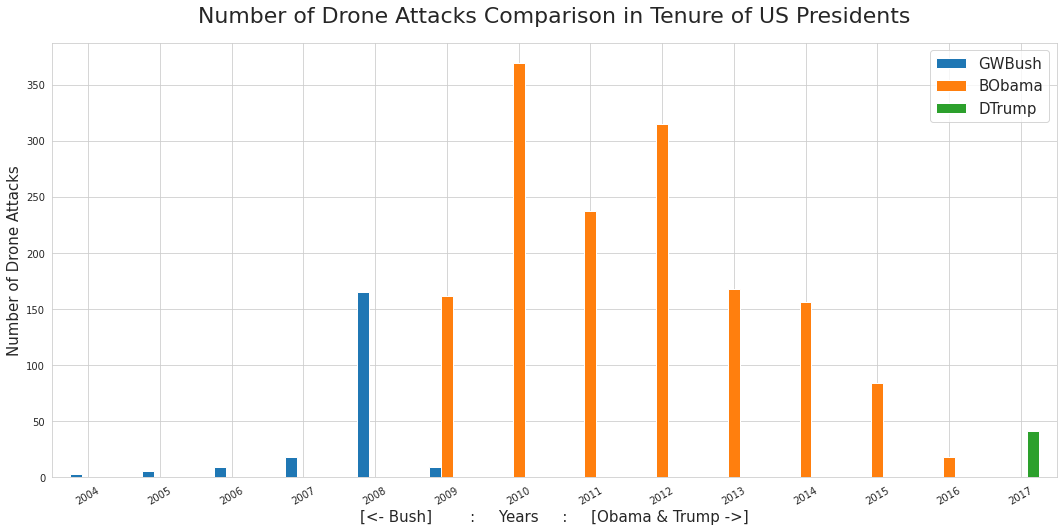

In [60]:
fig = dfTenure.plot(x='year', 
                y=['GWBush', 'BObama', 'DTrump'], 
                kind="bar", 
                figsize=(18,8), align='center'
                 )
fig.set_title("Number of Drone Attacks Comparison in Tenure of US Presidents", pad=20, fontdict={'fontsize':22})
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("[<- Bush]        :     Years     :     [Obama & Trump ->]", fontsize=15)
plt.ylabel("Number of Drone Attacks", fontsize=15)
fig.legend(loc=1,fontsize=15)

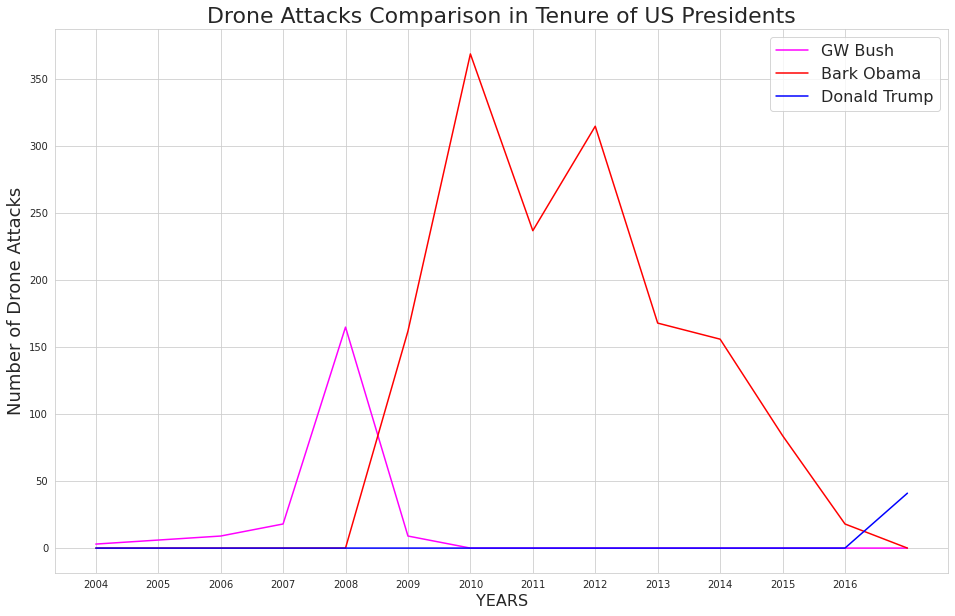

In [61]:
fig = plt.figure(figsize=(16, 10))
x = dfTenure['year']

plt.plot(x, dfTenure['GWBush'], color='magenta', label = 'GW Bush')
plt.plot(x, dfTenure['BObama'], color='red', label = 'Bark Obama')
plt.plot(x, dfTenure['DTrump'], color='blue', label = 'Donald Trump')

plt.xticks(range(df['year'].min(), df['year'].max()))
plt.xlabel("YEARS", fontsize=16)
plt.ylabel("Number of Drone Attacks", fontsize=18)
plt.title("Drone Attacks Comparison in Tenure of US Presidents", fontsize=22)
plt.legend(fontsize = 16)
plt.show()

In [62]:
from sklearn import preprocessing


df_corr = pd.DataFrame(df, columns=['No of Strike', 'Date', 'Time', 'customDate'])

df_corr['Time'] = df_corr['Time'].fillna('0')
df_corr['customDate'] = df_corr['customDate'].fillna('0')
df_corr['Time-cat'] = preprocessing.LabelEncoder().fit_transform(df_corr['Time'].values)
df_corr['customDate-cat'] = preprocessing.LabelEncoder().fit_transform(df_corr['customDate'].values)

df_corr.isna().sum()

No of Strike      0
Date              0
Time              0
customDate        0
Time-cat          0
customDate-cat    0
dtype: int64

In [63]:
feature1 = list(['No of Strike', 'customDate-cat', 'Time-cat'])
corr1 = df_corr[feature1].corr()
corr1

,No of Strike,customDate-cat,Time-cat
No of Strike,1.000000,0.242958,0.036720
customDate-cat,0.242958,1.000000,-0.066642
Time-cat,0.036720,-0.066642,1.000000


In [64]:
corr1.style.background_gradient(cmap='coolwarm')

,No of Strike,customDate-cat,Time-cat
No of Strike,1.000000,0.242958,0.036720
customDate-cat,0.242958,1.000000,-0.066642
Time-cat,0.036720,-0.066642,1.000000


<AxesSubplot:>

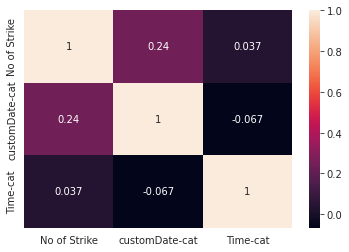

In [65]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr1, annot=True)

In [66]:
attackpercity = pd.DataFrame(columns=['city', 'total_attack'])
attackpercity['city'] = df['City'].unique().tolist()
attackpercity['total_attack'] = attackpercity['total_attack'].fillna('0').astype(np.int64)
attackpercity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          11 non-null     object
 1   total_attack  11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [67]:
for x, xRow in attackpercity.iterrows():
    tot_attack = df[df['City'] == xRow['city']]['No of Strike'].sum()
    attackpercity.at[x, 'total_attack'] = tot_attack
attackpercity

,city,total_attack
0,south waziristan,336
1,north waziristan,1314
2,bajaur agency,15
3,bannu,9
4,khyber,9
5,kurram agency,14
6,orakzai,3
7,khyber agency,27
8,lower kurram agency,15
9,hangu,15


In [68]:
figCity = [go.Bar(y = attackpercity['total_attack'],
                  x = attackpercity['city'],
                  text = np.round((attackpercity['total_attack']), 1),
                  textposition = 'outside',
                  width = [0.7, 0.7],
                  marker = dict(color = 'lightblue',
                                line_color = 'black',
                                line_width = 2))]

layout = go.Layout(title= 'Drone Attacks Per City',
                   xaxis = dict(title = 'Cities Name'),
                   yaxis = dict(title = 'Drone Attacks'),
                   width = 800,
                   height = 600,
                   template = 'plotly_white')

fig_plot = go.Figure(data = figCity, layout = layout)
iplot(fig_plot)
dfCivilians = pd.DataFrame(df, columns=['year', 'Al-Qaeda', 'Taliban', 
                                        'Civilians Min', 'Civilians Max', 
                                        'Foreigners Min', 'Foreigners Max'])

dfCivilians['Civilians'] = (((dfCivilians['Civilians Min'] + dfCivilians['Civilians Max'])/2) + 
                            ((dfCivilians['Foreigners Min'] + dfCivilians['Foreigners Max'])/2)).apply(np.ceil).astype('int64')
dfCivilians = dfCivilians.drop(['Civilians Min', 'Civilians Max', 'Foreigners Min', 'Foreigners Max'], axis=1)

dfCivilians['Terrorist'] = (dfCivilians['Al-Qaeda'] + dfCivilians['Taliban']).apply(np.ceil).astype('int64')
dfCiviliansbyYear = dfCivilians.groupby(['year'], as_index=False).sum().sort_values('year', ascending=True)
dfCiviliansbyYear

,year,Al-Qaeda,Taliban,Civilians,Terrorist
0,2004,0,3,6,3
1,2005,6,0,9,6
2,2006,0,0,150,0
3,2007,0,0,108,0
4,2008,33,75,795,108
5,2009,39,336,1311,375
6,2010,3,330,2193,333
7,2011,18,162,1143,180
8,2012,21,240,609,261
9,2013,15,249,192,264


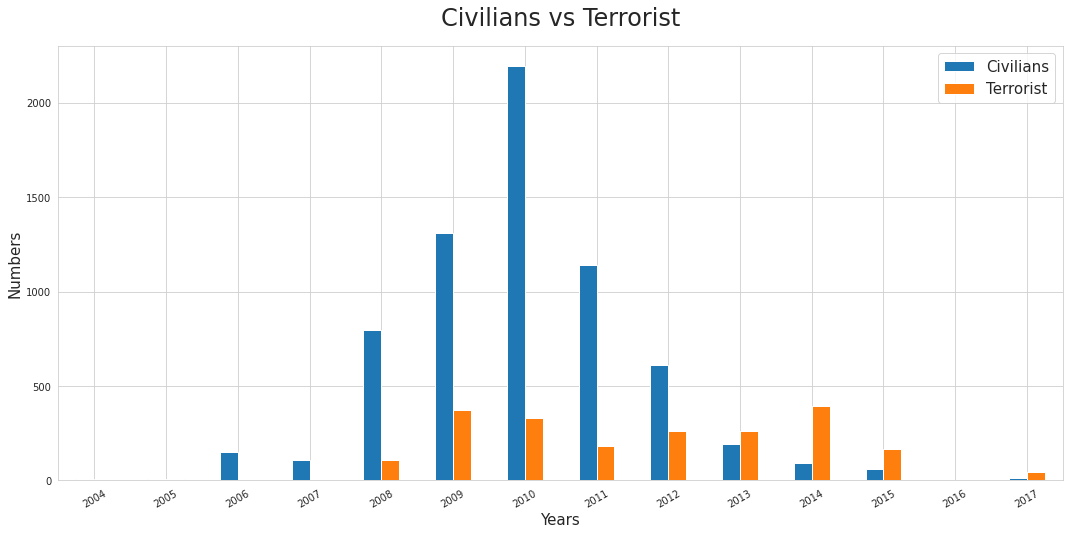

In [69]:
fig = dfCiviliansbyYear.plot(x='year', 
                             y=['Civilians', 'Terrorist'], 
                             kind="bar", 
                             figsize=(18,8), align='center'
                            )
fig.set_title("Civilians vs Terrorist", pad=20, fontdict={'fontsize':24})
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Years", fontsize=15)
plt.ylabel("Numbers", fontsize=15)
fig.legend(loc=1,fontsize=15)